<a href="https://colab.research.google.com/github/anaconda121/CDS/blob/main/Onboarding/CDS_Meeting_IV_Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Deep Learning**: A Subset of ML Involving Neural Networks

*By Andrew Chang*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor

from sklearn.model_selection import train_test_split

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# **1. Gradient Descent**

## 1.1. Theory

ML models involve minimizing a loss function.

Below is a manifold of the standard least squares loss function.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-03-17-32-54.png" width="400px" />

Let's say during the current iteration of your training, you are at point A. Eventually you want to get to point B. How?

Recall from calculus: Taking the gradient (derivative) of a function gives you the rate of change and its direction at each point.

Idea: Follow the direction of the gradient to the minimum.

<img src="https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png" width="400px" />

## 1.2. Math

All linear ML models involve training for the optimal weight vector $\mathbf{w} = [w_1, w_2, ..., w_d]$, the weights associated with each input feature $x_1, x_2, ..., x_d$.

Gradient descent update step: $\mathbf{w}_{t+1} ← \mathbf{w}_t - α∇L(\mathbf{w}_t)$.

* $\mathbf{w}_t$: Current weight vector at time step $t$
* $\alpha$: Learning rate / step size (Controls how big should the step size be, more on this later.)
* $∇L(\mathbf{w}_t)$: Gradient of your loss
* $\mathbf{w}_{t+1}$: Next weight vector

<img src="https://sebastianraschka.com/images/faq/gradient-optimization/ball.png" width="400px" />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/350px-Gradient_descent.svg.png" width="200px" />

Question: In the update rule, why do we subtract instead of add?

## 1.3. Coding Exercise

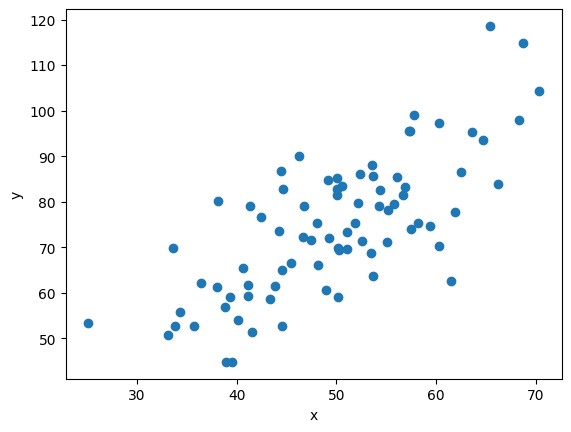

In [ ]:
## EXERCISE

# 1. Read linear_regression_data.csv with pandas and store it in df
df = pd.read_csv("../linear_regression_data.csv")
n = len(df)
x = df['X'].to_numpy()
y = df['Y'].to_numpy()

# 2. Split the dataset into x_train, x_test, y_train, y_test. Use 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# 3. Scatter plot x_train and y_train. Label x axis as 'x' and y axis as 'y'
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We want to find the line of best fit $Y = mX + b$ where $m$ is your slope and $b$ is your bias, which are the parameters you want to learn. Imagine $m$ as your weight to $x$.

We will use Mean Squared Loss (MSE): $\frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y_i})^2 = \frac{1}{n}\sum_{i=1}^{n}(y_i - (mx_i + b))^2$ where:
* $y_i$ is actual value
* $\bar{y_i}$ is predicted value

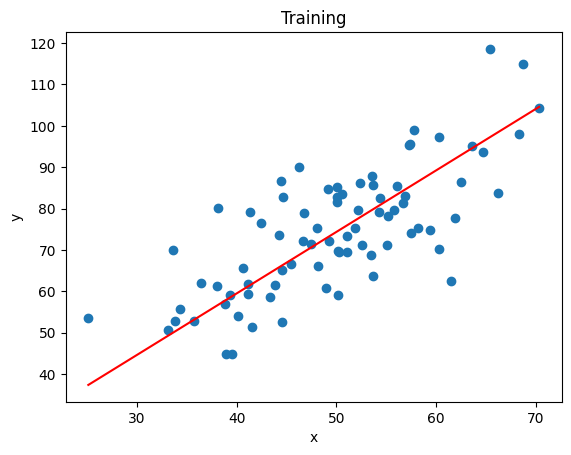

In [ ]:
## EXERCISE

def gradient_descent(alpha=0.0001):
  m = 0
  b = 0
  epochs = 20 # num of iterations to perform gradient descent
  losses = []
  ms = []

  for _ in range(epochs):
    # 1. generate y_pred from x_train. Remember Y = mX + b
    y_pred = m * x_train + b

    # 2. calculate loss between y_train and y_pred, store in loss
    loss = np.mean(np.square(y_train - y_pred))

    losses.append(loss)
    ms.append(m)

    # 3. calculate gradient of loss in respect to m, store in grad_m
    grad_m = (-2/n) * sum(x_train * (y_train - y_pred))

    # 4. calculate gradient of loss in respect to b, store in grad_b
    grad_b = (-2/n) * sum(y_train - y_pred)

    m = m - alpha * grad_m
    b = b - alpha * grad_b

  return m, b, losses, ms

m, b, losses, ms = gradient_descent()

train_preds = m * x_train + b
plt.scatter(x_train, y_train)
plt.title('Training')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([min(x_train), max(x_train)], [min(train_preds), max(train_preds)], color='red')
plt.show()

Let's run inference on our test set.

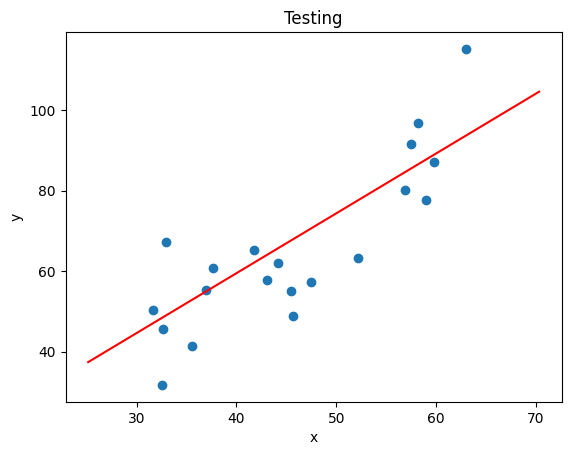

Test loss: 123.80435172073628


In [ ]:
# Inference
test_preds = m * x_test + b
plt.scatter(x_test, y_test)
plt.title('Testing')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([min(x_train), max(x_train)], [min(train_preds), max(train_preds)], color='red')
plt.show()

# MSE Testing Loss
# 1. Calculate test loss
loss = np.mean(np.square(y_test - test_preds))
print('Test loss:', loss)

Let's visualize the gradient descent steps.

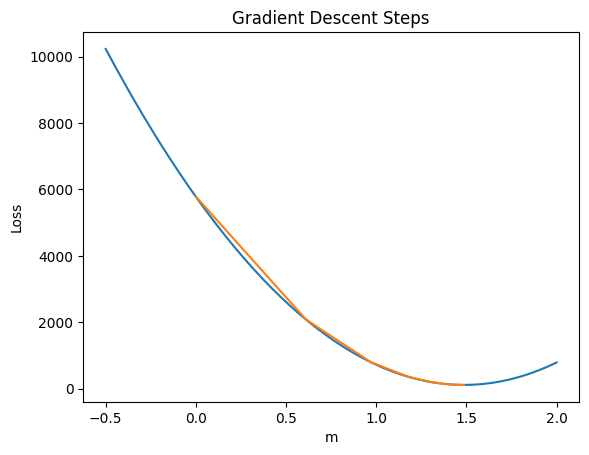

In [ ]:
def visualize_gradient(alpha=0.0001):
  x = []
  y = []

  for m in np.linspace(-0.5, 2, 50):
    y_pred = m * x_train + b
    x.append(m)
    y.append(np.mean(np.square(y_train - y_pred)))

  # x = np.arange(1, 21)
  _, _, losses, ms = gradient_descent(alpha=alpha)
  plt.plot(x, y)
  plt.plot(ms, losses)
  plt.title('Gradient Descent Steps')
  plt.xlabel('m')
  plt.ylabel('Loss')
  plt.show()

visualize_gradient()

As aforementioned, learning rate $\alpha$ is one of the hyperparameters that we need to tune that determines your step size. What happens when we change $\alpha$?

In [ ]:
visualize_gradient(alpha=0.00001) # really small step size
visualize_gradient(alpha=0.001) # larger step size

We see that
* When too large, gradient overshoots and explodes
* When too small, convergence too slow

Other problems with gradient descent:
* May only find local minima, not global minima
* Can be slow to converge
* Can be non-deterministic based on start point

<img src="https://srdas.github.io/DLBook/DL_images/TNN2.png" width="400px" />
<img src="https://www.researchgate.net/publication/338621083/figure/fig4/AS:847811214069760@1579145353037/Gradient-Descent-Stuck-at-Local-Minima-18.ppm" width="300px" />

Other optimizers to deal with these problems:
* Stochastic Gradient Descent (SGD)
* Adaptive Gradient Descent (Adagrad)
* ADAM

In our example, we only dealt with gradient descent in its simplest form: MSE loss function and dataset with only one feature. More complex loss functions with lots of features might be harder to visualize, but gradient descent extends to higher dimensions the same way. You may want to learn vector and matrix calculus properly, but not necessarily needed.

# **2. Neural Networks**

<img src="https://www.unite.ai/wp-content/uploads/2023/05/Featured-Blog-Image-Liquid-Neural-Networks-Definition-Applications-and-Challenges.jpg" width="500px" />

## 2.1. Linear Classifiers Review

The primary idea behind linear classification is to define a decision boundary, or more formally a hyperplane, in the feature space that separates the two classes. This decision boundary is a linear function of the input features, and it can be represented as:

$y = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d$

Where:
* $y$ is the output or prediction
* $w_0$ is the bias term or intercept
* $w_1, w_2, ..., w_d$ are the weights associated with each input feature $x_1, x_2, ..., x_d$

You can collect all the weights as vector $\mathbf{w} = [w_1 \ ... \ w_d]$ and all the input features as $\mathbf{x} = [x_1 \ ... \ x_d]$ and represent the classifier as $\mathbf{w} \cdot \mathbf{x} + w_0$. You can optionally collect the bias term into the weight vector as well and have $\mathbf{w} = [w_0 \ w_1 \ ... \ w_d]$ and $\mathbf{x} = [1 \ x_1 \ ... \ x_d]$.

## 2.2. Perceptrons
(Invented here at Cornell!)

<img src="https://www.cs.cornell.edu/courses/cs4780/2023sp/lectures/images/perceptron/perceptron_img1.png" width="400px" />

Above is a binary linear classifier with two features called the **perceptron**. In the binary linear classification setting, your typical label space is $C = \{-1, +1\}$.

* In training, if the sign of your prediction matches your label, it is correctly classified.
* In testing, if $y > 0$, test point classified as $+1$, else classified as $-1$.

Why? Dot products!

For today, you do not need to know how perceptrons are trained, but just understand them as a linear classifier on a hyperplane. Can describe briefly if you would like to though!

Perceptrons can be reimagined as an artificial neuron:

<img src="https://miro.medium.com/v2/resize:fit:645/0*LJBO8UbtzK_SKMog" width="400px" />

The input features and their associated weights are multiplied, and summed up to give your prediction.

## 2.3. Multilayer Perceptrons (MLP)

Chain the perceptrons together and you get a multilayer perceptron (MLP):

<img src="https://media.geeksforgeeks.org/wp-content/uploads/nodeNeural.jpg" />

Components of MLPs:
* Input Layer: Stores your input data
* **Hidden Layers**: May contain one or more hidden layers. Captures complex patterns and representations in the data
* Edges represent weights
* Output Layer: Outputs. Number of neurons may depend on task
* **Activation Functions**: Introduces non-linearities that enable NNs to model complex relationships in the data. Common types are sigmoid, ReLU, tanh, and softmax.

<img src="https://assets-global.website-files.com/614c82ed388d53640613982e/64a6b6518fddd62aa2605e17_how%20do%20activation%20functions%20work.webp" width="300px" />

<img src="https://camo.githubusercontent.com/4f10f5ca45c12507997e69a9c147cf7afd76382247ea50e92cbbfad13e4d1a7a/687474703a2f2f6164696c6d6f756a616869642e636f6d2f696d616765732f61637469766174696f6e2e706e67" width="400px" />

* Sigmoid: maps values to $[0, 1]$
* tanh: maps values to $[-1, 1]$
* ReLU: most common now

Softmax activation function:

<img src="https://miro.medium.com/v2/resize:fit:1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" width="400px" />

## 2.4. Back to Neural Networks

You add more layers and you get typical artificial neural networks. You add a lot of them and it becomes **deep**. The term deep learning comes from the idea that you just train deep into many layers of a neural network.

How do you typically work with neural networks?

1. Forward pass: make prediction and calculate loss
2. Compute error
3. Backward pass (backpropagation): calculate gradient of loss function and update weights accordingly (autograd)

<img src="https://editor.analyticsvidhya.com/uploads/18870backprop2.png" width="500px" />

Question to wrap up: Why do neural networks work?

# **3. Convolutional Neural Networks (CNNs)**

<img src="https://www.mdpi.com/sensors/sensors-19-04933/article_deploy/html/images/sensors-19-04933-g001.png" width="500px" />

A special class of ANNs designed for processing structured grid data, such as images and videos. Proven to be highly effective in various computer vision tasks, including image classification, object detection, facial recognition, and more. Inspired by the human visual system and designed to automatically and adaptively learn hierarchical features from data


In [ ]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

print(train_data)
print(test_data)
print(train_data.data.size())
print(train_data.targets.size())

plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

loaders = {
  'train' : torch.utils.data.DataLoader(train_data,
                                        batch_size=100,
                                        shuffle=True,
                                        num_workers=1),

  'test'  : torch.utils.data.DataLoader(test_data,
                                        batch_size=100,
                                        shuffle=True,
                                        num_workers=1),
}

## 3.1. Convolution Operation

<img src="https://tikz.net/janosh/conv2d.png" width="500px" />
<img src="https://miro.medium.com/v2/resize:fit:1206/1*ZPXWZDIHFbTxs-6KVPS5gg.png" width="500px" />

Think of convolution as a pattern detector.

## 3.2. Pooling

<img src="https://www.researchgate.net/publication/354036236/figure/fig2/AS:1132444669493302@1647007257649/Operations-carried-out-by-the-convolution-and-pooling-layers-A-max-pooling-layer-picks.jpg" width="500px" />

Why pooling?
* **Dimensionality Reduction**: Reduces the spatial dimensions of the feature maps generated by the convolutional layers. By downsampling the feature maps, pooling reduces the number of parameters in the network, which can help reduce overfitting and computational complexity.
* **Translation Invariance**: Small spatial variations in the input data have less impact on the pooled output. This makes the network more robust to small shifts and distortions in the input, which is particularly important in computer vision tasks where objects can appear in different positions in an image.
* **Feature Selection**: Identify the most important features or patterns in the feature maps. By aggregating information from a local neighborhood (e.g., max pooling or average pooling), the pooled output highlights the presence of relevant features, while less informative details are discarded.
* **Reduction of Overfitting**: Pooling can act as a form of regularization by reducing the spatial resolution of the feature maps. Smaller feature maps mean fewer parameters, which, in turn, can help prevent overfitting by making the model more generalizable to different input variations.
* **Computation Efficiency**: Smaller feature maps obtained through pooling require fewer computations during both training and inference, leading to faster and more efficient processing.

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=2,
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(16, 32, 5, 1, 2),
        nn.ReLU(),
        nn.MaxPool2d(2),
    )
    # fully connected layer, output 10 classes
    self.out = nn.Linear(32 * 7 * 7, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output, x    # return x for visualization

In [ ]:
cnn = CNN()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.01)
num_epochs = 10

In [ ]:
def train(num_epochs, cnn, loaders):
  cnn.train()

  # Train the model
  total_step = len(loaders['train'])

  for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loaders['train']):
      # gives batch data, normalize x when iterate train_loader
      b_x = Variable(images) # batch x
      b_y = Variable(labels) # batch y
      output = cnn(b_x)[0]
      loss = loss_func(output, b_y)

      # clear gradients for this training step
      optimizer.zero_grad()

      loss.backward() # backpropagation, compute gradients
      optimizer.step() # apply gradients

      if (i+1) % 100 == 0:
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

train(num_epochs, cnn, loaders)

In [ ]:
def test():
  # Test the model
  cnn.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loaders['test']:
      test_output, last_layer = cnn(images)
      pred_y = torch.max(test_output, 1)[1].data.squeeze()
      accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
  print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

test()

In [ ]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:10].numpy()
actual_number

In [ ]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')